<a href="https://colab.research.google.com/github/LilyLiu945/12-week-python-journey/blob/main/Card_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zhijie Liu Project: Card Game Suite (War + Blackjack)


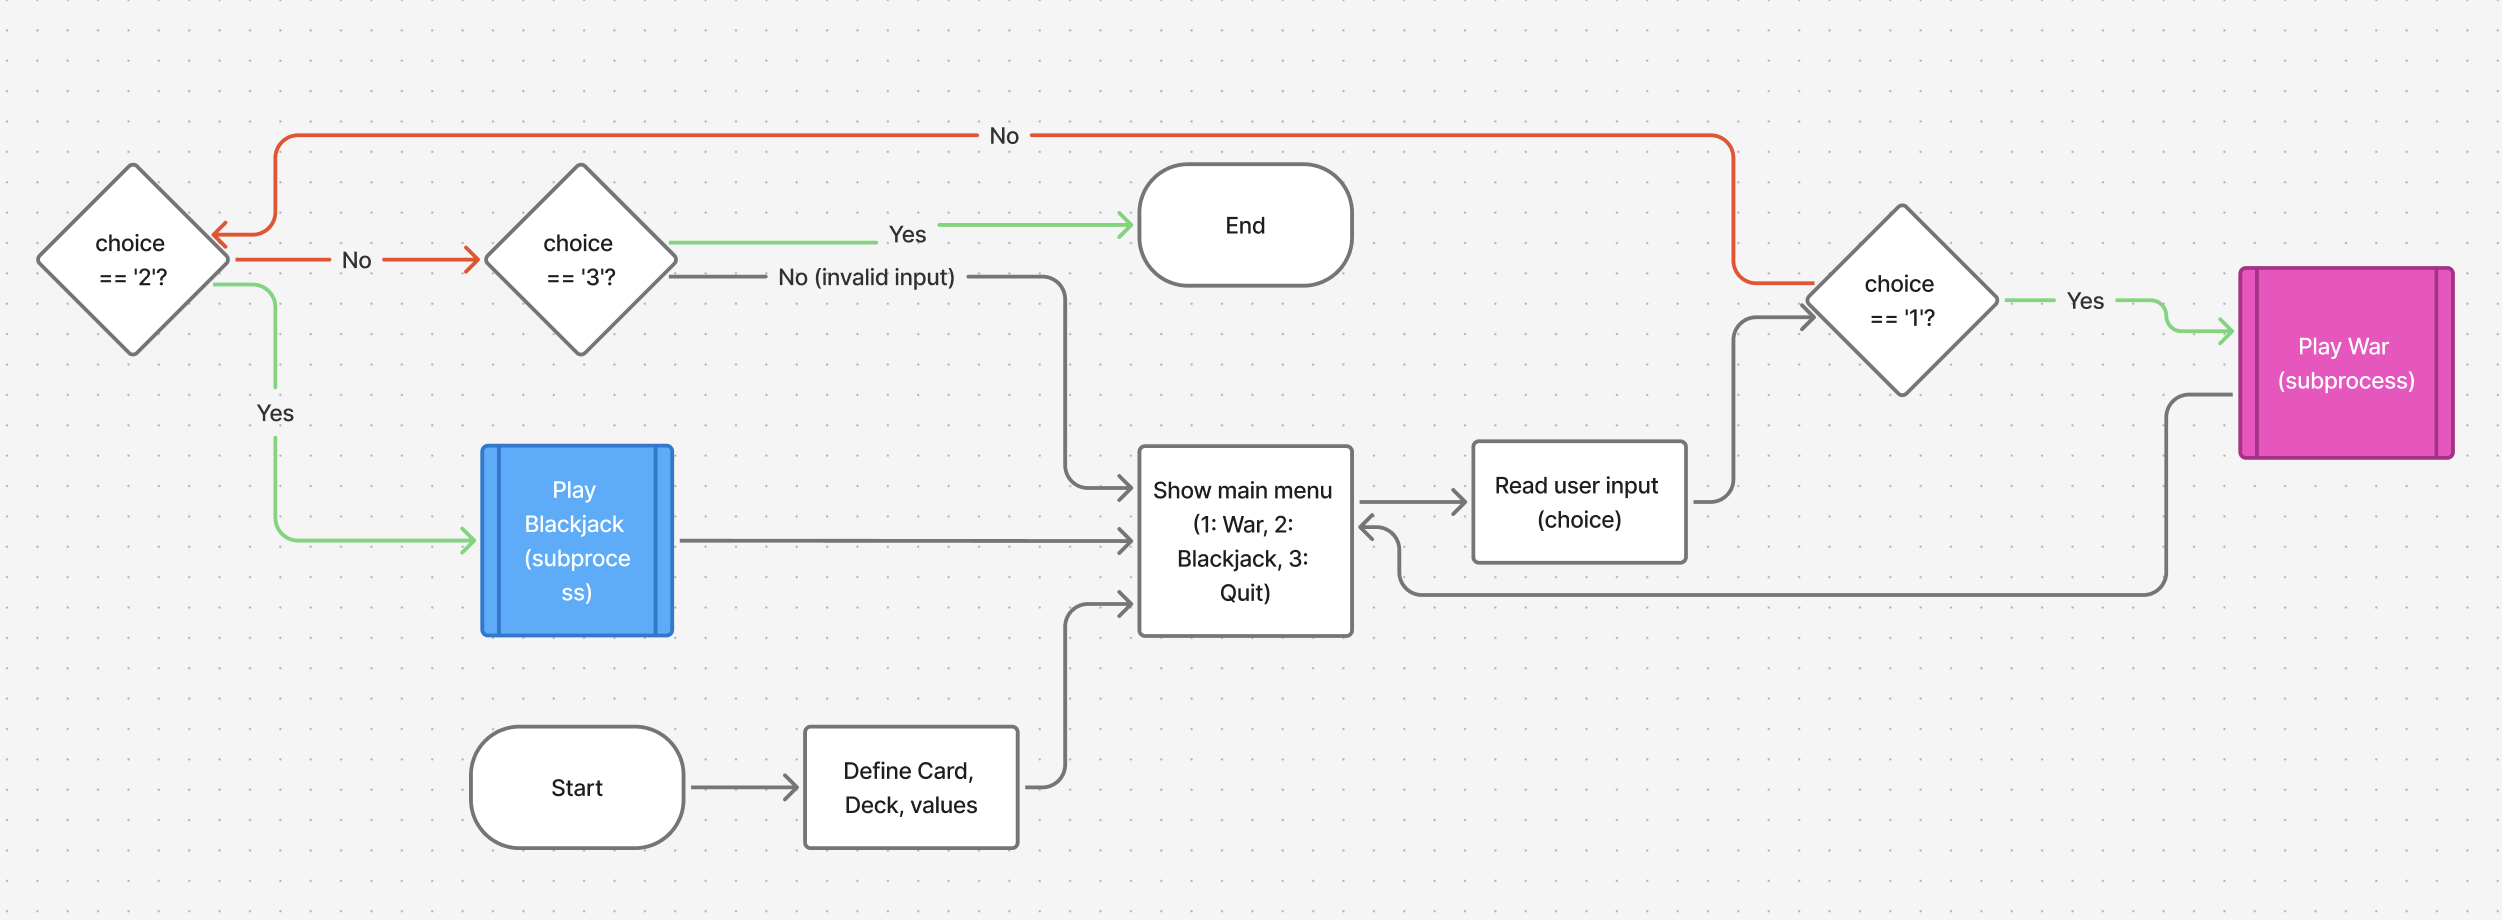

Shared Card Model

In [13]:
import random

suits = ('Hearts', 'Diamonds', 'Spades', 'Clubs')
ranks = ('Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight',
         'Nine', 'Ten', 'Jack', 'Queen', 'King', 'Ace')
values = {
    'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5, 'Six': 6,
    'Seven': 7, 'Eight': 8, 'Nine': 9, 'Ten': 10,
    'Jack': 11, 'Queen': 12, 'King': 13, 'Ace': 14
}

class Card:
    # Represents a single playing card.
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = values[rank]

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    # Standard 52-card deck with shuffle and deal.
    def __init__(self):
        self.all_cards = [Card(suit, rank) for suit in suits for rank in ranks]
        self.shuffle()  # always start with a shuffled deck

    def shuffle(self):
        random.shuffle(self.all_cards)

    def deal_one(self):
        return self.all_cards.pop()

    def __len__(self):
        return len(self.all_cards)

# Game 1: War

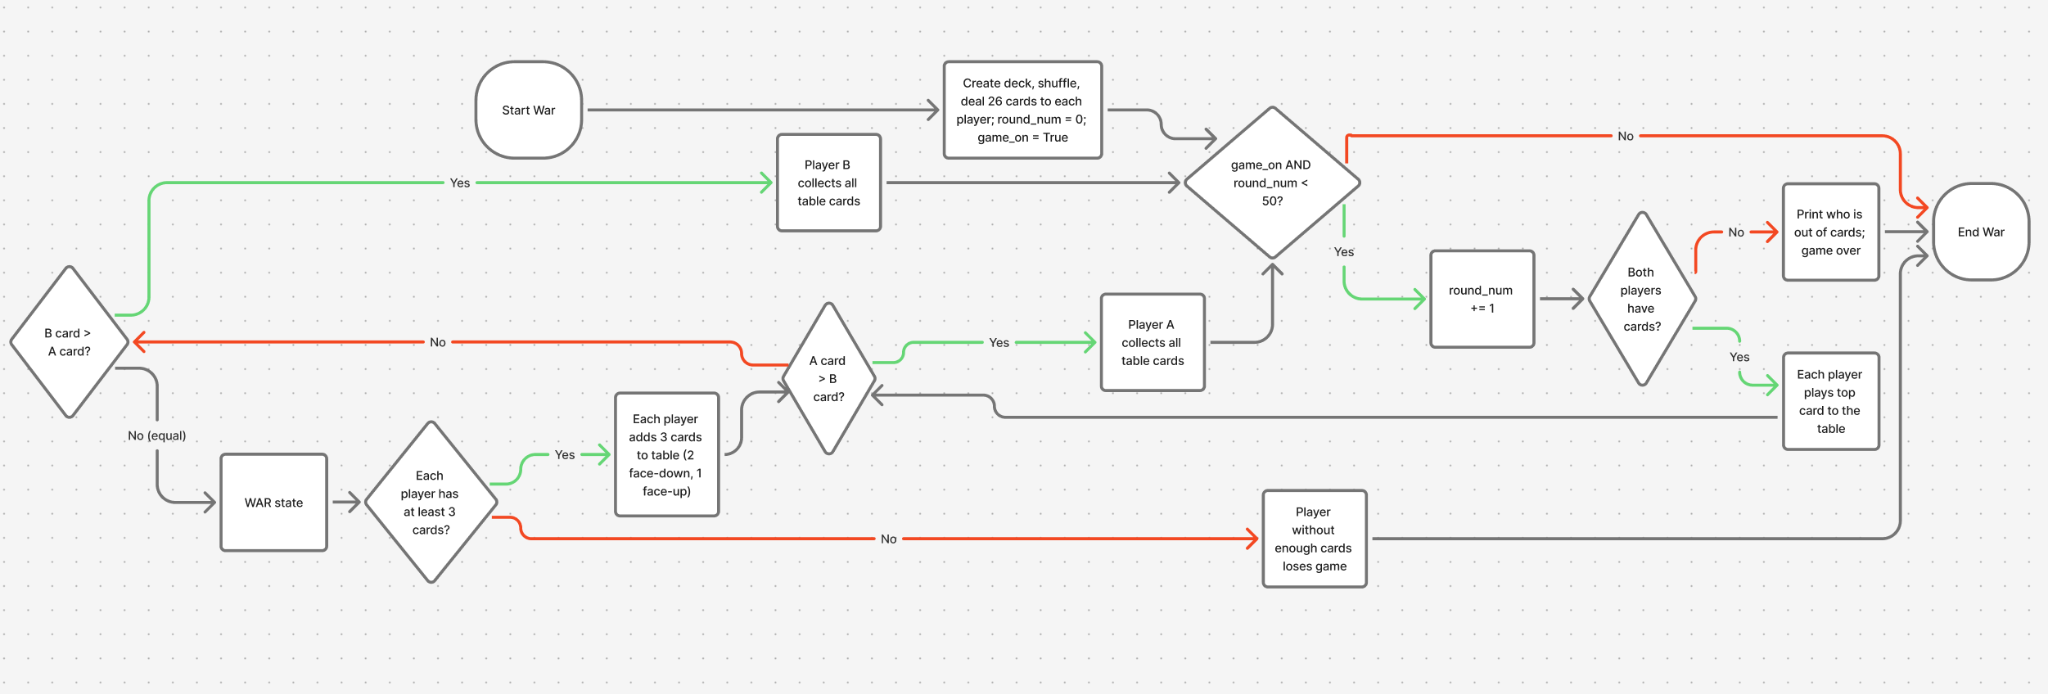

In [14]:
class WarPlayer:
    # Player model for the War game.
    def __init__(self, name):
        self.name = name
        self.all_cards = []

    def has_cards(self):
        return len(self.all_cards) > 0

    def remove_one(self):
        # Removes one card from the top of the player's pile.
        return self.all_cards.pop(0)

    def add_cards(self, new_cards):
        # Adds one card or a list of cards to the bottom of the pile.
        if isinstance(new_cards, list):
            self.all_cards.extend(new_cards)
        else:
            self.all_cards.append(new_cards)

    def __str__(self):
        return f"{self.name} has {len(self.all_cards)} cards."

def play_war(max_rounds=50):
    # Plays a game of War between two computer players.
    # max_rounds is used to prevent an infinite loop.
    print("\n================== WAR ==================")
    deck = Deck()

    player_one = WarPlayer("Player A")
    player_two = WarPlayer("Player B")

    # Split the deck evenly
    for _ in range(26):
        player_one.add_cards(deck.deal_one())
        player_two.add_cards(deck.deal_one())

    round_num = 0
    game_on = True

    while game_on and round_num < max_rounds:
        round_num += 1
        print(f"\n--- Round {round_num} ---")

        # Check if a player is out of cards
        if not player_one.has_cards():
            print("Player A is out of cards! Player B wins the game.")
            break
        if not player_two.has_cards():
            print("Player B is out of cards! Player A wins the game.")
            break

        # Start a new battle
        table_cards_p1 = [player_one.remove_one()]
        table_cards_p2 = [player_two.remove_one()]

        at_war = True

        while at_war:
            print(f"{player_one.name} plays: {table_cards_p1[-1]}")
            print(f"{player_two.name} plays: {table_cards_p2[-1]}")

            if table_cards_p1[-1].value > table_cards_p2[-1].value:
                print("Player A wins this round.")
                player_one.add_cards(table_cards_p1 + table_cards_p2)
                at_war = False

            elif table_cards_p1[-1].value < table_cards_p2[-1].value:
                print("Player B wins this round.")
                player_two.add_cards(table_cards_p1 + table_cards_p2)
                at_war = False

            else:
                # War situation
                print("WAR!")

                # Check if players have enough cards to continue war
                if len(player_one.all_cards) < 3:
                    print("Player A cannot continue war. Player B wins the game.")
                    game_on = False
                    break
                if len(player_two.all_cards) < 3:
                    print("Player B cannot continue war. Player A wins the game.")
                    game_on = False
                    break

                # Each player places 3 more cards: 2 face-down, 1 face-up
                for _ in range(3):
                    table_cards_p1.append(player_one.remove_one())
                    table_cards_p2.append(player_two.remove_one())
                # Loop continues, comparing the new last cards

    if round_num >= max_rounds:
        print("\nReached maximum number of rounds, stopping the game.")
        print(player_one)
        print(player_two)

# Game 2: Blackjack

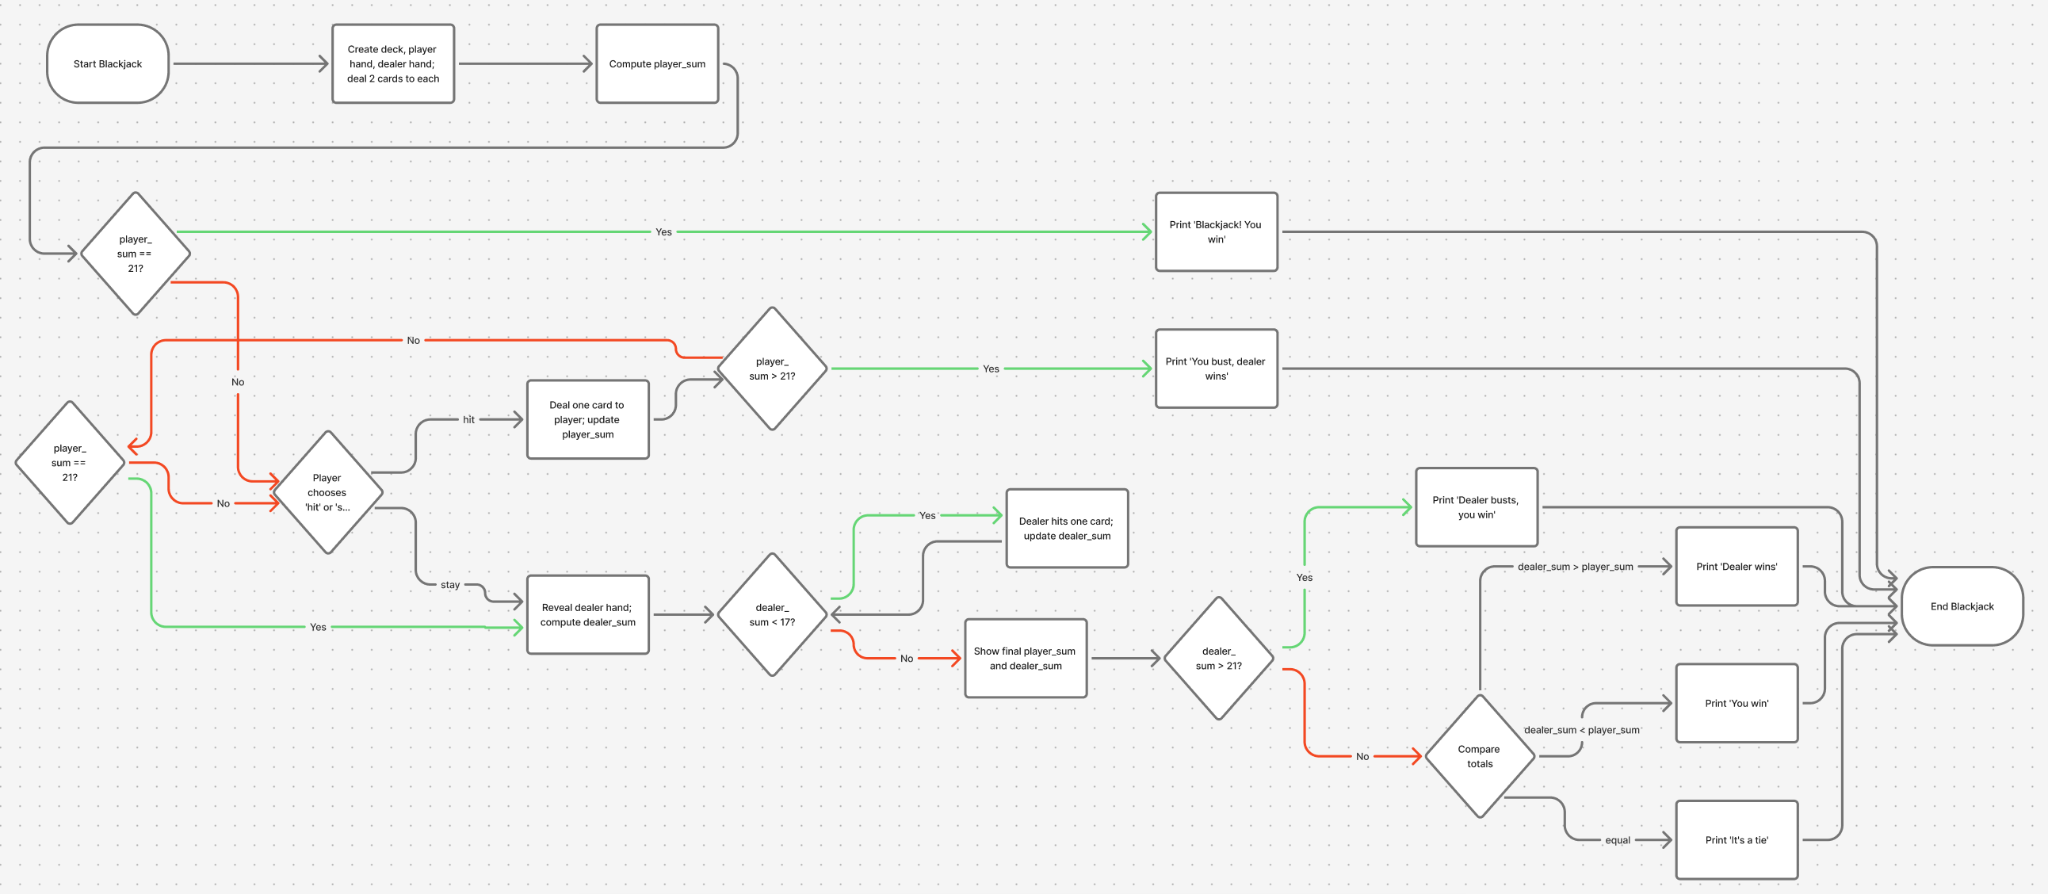

In [15]:
def calculate_sum(cards):
    # Calculates the blackjack value of a hand, handling Aces as 1 or 11.
    total = 0
    aces = 0
    for card in cards:
        total += card.value
        if card.rank == "Ace":
            aces += 1
    # Reduce Ace from 11 to 1 while busting
    while total > 21 and aces:
        total -= 10
        aces -= 1
    return total

class BlackjackHand:
    # Represents a blackjack hand (for both player and dealer).
    def __init__(self, name):
        self.name = name
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def reveal_all(self):
        return self.cards

    def show_upcard(self):
        return self.cards[0]

    def total(self):
        return calculate_sum(self.cards)

    def __str__(self):
        return f"{self.name}: {self.total()} with {[str(c) for c in self.cards]}"

def play_blackjack():
    # Simple console-based blackjack between player and dealer.
    print("\n================ BLACKJACK ================")
    deck = Deck()
    player = BlackjackHand("You")
    dealer = BlackjackHand("Dealer")

    # Initial deal: two cards each
    for _ in range(2):
        player.add_card(deck.deal_one())
        dealer.add_card(deck.deal_one())

    print(f"Dealer shows: {dealer.show_upcard()}")
    print("Your cards:", [str(card) for card in player.reveal_all()])
    player_sum = player.total()

    # Check for immediate blackjack
    if player_sum == 21:
        print("Blackjack! You win immediately!")
        return

    # ---- Player turn ----
    while True:
        print(f"\nYour total is {player_sum}.")
        choice = input("Do you want to hit or stay? ").strip().lower()

        if choice == "hit":
            new_card = deck.deal_one()
            player.add_card(new_card)
            player_sum = player.total()
            print("You drew:", new_card)
            print("Your cards:", [str(card) for card in player.reveal_all()])
            if player_sum > 21:
                print("You bust! Dealer wins.")
                return
            elif player_sum == 21:
                print("You hit 21!")
                break
        elif choice == "stay":
            print("You stay.")
            break
        else:
            print("Please type 'hit' or 'stay'.")

    # ---- Dealer turn ----
    print("\nDealer's turn...")
    print("Dealer's cards:", [str(card) for card in dealer.reveal_all()])
    dealer_sum = dealer.total()
    print(f"Dealer's total: {dealer_sum}")

    while dealer_sum < 17:
        card = deck.deal_one()
        dealer.add_card(card)
        dealer_sum = dealer.total()
        print("Dealer draws:", card)
        print(f"Dealer's total is now {dealer_sum}")

    print("\nFinal hands:")
    print("Your hand:", [str(card) for card in player.reveal_all()], "=>", player_sum)
    print("Dealer's hand:", [str(card) for card in dealer.reveal_all()], "=>", dealer_sum)

    if dealer_sum > 21:
        print("Dealer busts! You win!")
    elif dealer_sum > player_sum:
        print("Dealer wins!")
    elif dealer_sum < player_sum:
        print("You win!")
    else:
        print("It's a tie!")

Helper: main menu

In [16]:
def main_menu():
    # Simple text menu to choose which game to play.
    while True:
        print("\n===== Python Card Game Suite =====")
        print("1) Play War")
        print("2) Play Blackjack")
        print("3) Quit")

        choice = input("Select an option (1-3): ").strip()

        if choice == "1":
            play_war()
        elif choice == "2":
            play_blackjack()
        elif choice == "3":
            print("Goodbye!")
            break
        else:
            print("Invalid choice, please enter 1, 2, or 3.")

# Start Game!

In [21]:
main_menu()


===== Python Card Game Suite =====
1) Play War
2) Play Blackjack
3) Quit
Select an option (1-3): 2

================ BLACKJACK ================
Dealer shows: Three of Spades
Your cards: ['Two of Hearts', 'King of Hearts']

Your total is 15.
Do you want to hit or stay? hit
You drew: Jack of Hearts
Your cards: ['Two of Hearts', 'King of Hearts', 'Jack of Hearts']
You bust! Dealer wins.

===== Python Card Game Suite =====
1) Play War
2) Play Blackjack
3) Quit
Select an option (1-3): 1

================== WAR ==================

--- Round 1 ---
Player A plays: Eight of Hearts
Player B plays: Eight of Spades
WAR!
Player A plays: Four of Diamonds
Player B plays: Jack of Diamonds
Player B wins this round.

--- Round 2 ---
Player A plays: Ace of Diamonds
Player B plays: King of Hearts
Player A wins this round.

--- Round 3 ---
Player A plays: Three of Diamonds
Player B plays: Queen of Hearts
Player B wins this round.

--- Round 4 ---
Player A plays: King of Spades
Player B plays: Three of Hea